# Pipeline to read Leica images into Python

### Importing Libraries

In [ ]:
# # Importing libraries
# import sys
# import pathlib
# import warnings
# from readlif.reader import LifFile
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib_scalebar.scalebar import ScaleBar
# import pandas as pd

# import seaborn as sns
# import matplotlib.pyplot as plt 
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.patches import Circle
# import trackpy as tp
# from skimage.measure import find_contours
# #from aicsimageio import AICSImage
# from bioio import BioImage

# import tifffile

# # big fish library
# import bigfish.stack as stack
# import bigfish.plot as plot
# import bigfish.detection as detection
# import bigfish.multistack as multistack

# warnings.filterwarnings("ignore")

In [1]:
import sys; from pathlib import Path; current_dir = Path().resolve()
src_dir = next(parent / 'src' for parent in Path().absolute().parents if (parent / 'src').is_dir())
sys.path.extend([str(src_dir), str(src_dir / 'pipelines')])
main_dir = Path(src_dir.parents[0])
from imports import * 


In [ ]:
# from pathlib import Path
# def find_src_directory(current_directory: Path) -> Path:
#     # Loop through the parent directories
#     for parent in current_directory.parents:
#         potential_src = parent / 'src'
#         if potential_src.is_dir():
#             return potential_src
#     return None

### Path to source directory

In [ ]:
# # Defining directories
# current_dir = pathlib.Path().absolute()
# micro_dir = find_src_directory(current_dir)
# #Advanced_Microscopy_dir = current_dir.parents[0].joinpath('src')

# # Importing Advanced_Microscopy module
# sys.path.append(str(micro_dir))
# import microscopy as mi 

In [2]:
# Path to Images
#path_my_folder = pathlib.Path(r"/Users/nzlab-la/Library/CloudStorage/OneDrive-TheUniversityofColoradoDenver/General - Zhao (NZ) Lab/Microscope/Luis Aguilera/superfolding_GFP/20240611 IF-pNZ212 or pNZ222-Cy3_anti-HA ab")
#path_my_folder = pathlib.Path(r"/Users/luisaguilera/Library/CloudStorage/OneDrive-TheUniversityofColoradoDenver/General - Zhao (NZ) Lab/Microscope/Luis Aguilera/superfolding_GFP/20240611 IF-pNZ212 or pNZ222-Cy3_anti-HA ab")
#data_folder_path =path_my_folder.joinpath(r"20240611 IF_pNZ222-LaG16-Cy3_anti-HA-ab_anti-mouse-ab-Alexa488.lif") # wtGFP
#data_folder_path =path_my_folder.joinpath(r"20240611 IF_pNZ212_LaG16-Cy3_anti-HA-ab_ani-mouse-ab-Alexa488.lif") # sfGFP
#data_folder_path =path_my_folder.joinpath(r"20240611 IF_Non-transfected cell.lif") # control

data_folder_path = Path("/Users/nzlab-la/Library/CloudStorage/OneDrive-TheUniversityofColoradoDenver/General - Zhao (NZ) Lab/Microscope/Luis Aguilera/20250710_pGG001.lif")


In [3]:
list_images,list_names, pixel_xy_um, voxel_z_um, channel_names,number_color_channels,_,_,_,_,_ = mi.ReadLif(data_folder_path,show_metadata=True,save_tif=False,save_png=True,format='TZYXC').read()



Number of images: 9
----------------------------------------
[0] Series001
  shape=(2000, 1, 512, 512, 2), dtype=uint16
  channels = ['Green', 'Red']
  pixel Z=0.000  XY=0.130
  time=0.521s  bitdepth=16
  laser lines   = [405, 488, 561, 638]
  intensities    = [0.0, 2.0, 0.0, 5.0]
  spectral ranges= [(438, 492), (500, 550), (638, 643), (650, 700)]
----------------------------------------
[1] Series002
  shape=(2000, 1, 512, 512, 2), dtype=uint16
  channels = ['Green', 'Red']
  pixel Z=0.000  XY=0.130
  time=0.521s  bitdepth=16
  laser lines   = [405, 488, 561, 638]
  intensities    = [0.0, 2.0, 0.0, 5.0]
  spectral ranges= [(438, 492), (500, 550), (638, 643), (650, 700)]
----------------------------------------
[2] Series003
  shape=(1000, 1, 512, 512, 2), dtype=uint16
  channels = ['Green', 'Red']
  pixel Z=0.000  XY=0.130
  time=1s  bitdepth=16
  laser lines   = [405, 488, 561, 638]
  intensities    = [0.0, 2.0, 0.0, 5.0]
  spectral ranges= [(438, 492), (500, 550), (638, 643), (650, 

In [45]:
voxel_z_um

0

In [53]:
selected_image = 2

In [56]:
print(list_images[selected_image].shape)
img = list_images[selected_image][0,0,:,:,0]


(1000, 1, 512, 512, 2)


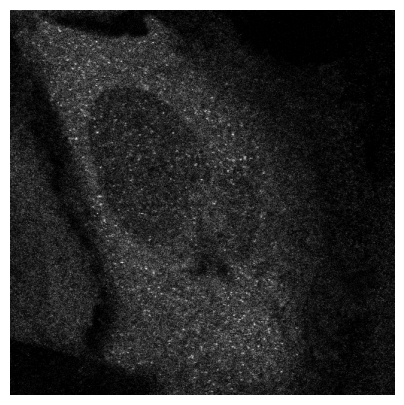

In [55]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray', vmax=np.percentile(img, 99.995), vmin=np.percentile(img, 0.5))
plt.axis('off')
plt.show()


In [ ]:
# from pathlib import Path
# import numpy as np
# import tifffile

def export_ome_tif_series(
    list_images,
    pixel_xy_um,
    voxel_z_um,
    channel_names,
    series_index: int,
    start_frame: int,
    end_frame: int,
    out_folder: Path or str,
    prefix: str = None
):
    """
    Export a selected sub-stack from a list of LIF-loaded series as OME-TIFF.

    Parameters
    ----------
    list_images : list of np.ndarray
        Each entry is an array of shape (T, Z, Y, X, C) for one series.
    pixel_xy_um : float
        Physical pixel size in XY (µm).
    voxel_z_um : float
        Physical voxel size in Z (µm).
    channel_names : list of str
        Names of the channels.
    series_index : int
        Which series in list_images to export.
    start_frame : int
        First frame index to include (inclusive).
    end_frame : int
        One-past-last frame index to include (exclusive).
    out_folder : Path or str
        Directory where the OME-TIFF will be written.
    prefix : str, optional
        Prefix for the filename (default: 'series{series_index}').
    """
    out_folder = Path(out_folder)
    out_folder.mkdir(exist_ok=True, parents=True)

    # Pick the series data
    series = list_images[series_index]  # shape (T, Z, Y, X, C)

    # Subset frames
    sub = series[start_frame:end_frame]  # (n_frames, Z, Y, X, C)

    # Reorder to (T, C, Z, Y, X)
    ome_stack = np.moveaxis(sub, 4, 1)

    # Metadata
    bit_depth = 16  # or adjust if you have another bit-depth variable
    metadata = {
        'axes': 'TCZYX',
        'SignificantBits': bit_depth,
        'PhysicalSizeX': float(pixel_xy_um),  # µm
        'PhysicalSizeZ': float(voxel_z_um),   # µm
        'TimeIncrement': 1.0,                 # seconds, adjust if known
        'TimeIncrementUnit': 's',
        'Channel': {'Name': channel_names}
    }

    # Filename
    fn_prefix = prefix or f"series{series_index}"
    filename = f"{fn_prefix}_{start_frame:04d}-{end_frame-1:04d}.ome.tif"
    out_path = out_folder / filename

    # Write OME-TIFF
    tifffile.imwrite(
        out_path,
        ome_stack.astype(np.uint16),
        imagej=False,
        metadata=metadata
    )
    print(f"Written: {out_path}")


# Example usage in a notebook:
export_ome_tif_series(
     list_images,
     pixel_xy_um,
     voxel_z_um,
     channel_names,
     series_index=selected_image,
     start_frame=0,
     end_frame=500,
     out_folder="exports",
     prefix="pGG001_series002"
)

Written: exports/pGG001_series002_0000-0599.ome.tif
